# Pregunta 1.2

### Denoising

In [1]:
from keras.datasets import mnist
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import np_utils
from keras.optimizers import SGD
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import binomial
from numpy.random import standard_normal
from keras.models import load_model
from keras.models import model_from_json

Using Theano backend.


In [2]:
def f(nval=1000):
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    x_val = x_train[-nval:]
    y_val = y_train[-nval:]
    x_train = x_train[:-nval]
    y_train = y_train[:-nval]
    Y_train = np_utils.to_categorical(y_train, 10)
    Y_val = np_utils.to_categorical(y_val, 10)
    Y_test = np_utils.to_categorical(y_test, 10)
    return (x_train, Y_train, y_train), (x_test, Y_test, y_test), (x_val, Y_val, y_val)

In [3]:
# Obtener conjuntos de datos
train, test, val = f()
x_train, Y_train, y_train = train
x_test, Y_test, y_test = test
x_val, Y_val, y_val = val

## a)

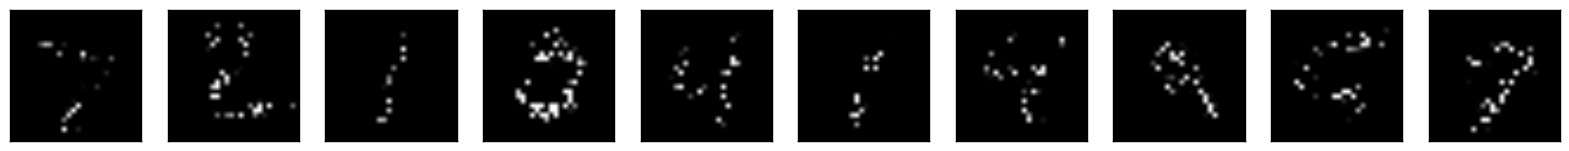

In [4]:
noise_level = 0.2
noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
noisy_x_train = x_train*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_val.shape)
noisy_x_val = x_val*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
noisy_x_test = x_test*noise_mask

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(noisy_x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Se puede visualizar la versión corrupta de las imágenes con un ruido de 0.2

## b)

```python
noise_levels = [0.1,0.2,0.4,0.6,0.8,1.0]
i = 0

for noise_level in noise_levels:
    i += 1
    noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
    noisy_x_train = x_train*noise_mask
    noise_mask = binomial(n=1,p=noise_level,size=x_val.shape)
    noisy_x_val = x_val*noise_mask
    noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
    noisy_x_test = x_test*noise_mask

    input_img = Input(shape=(784,))
    encoded = Dense(32, activation='sigmoid')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(32,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    autoencoder.fit(noisy_x_train,x_train,nb_epoch=50,batch_size=25,shuffle=True, validation_data=(noisy_x_val, x_val))
    autoencoder.save("autoencoder"+str(i)+".h5")
    encoder.save("encoder"+str(i)+".h5")
    decoder.save("decoder"+str(i)+".h5")
    # Se ejecuta en servidor con GPU
```

In [6]:
# Se carga el output obtenido para mostrarlo
text_file = open('1_2/outputb', 'r')

output = text_file.read()

#print output
    
noise_levels = [0.1,0.2,0.4,0.6,0.8,1.0]

for j in range(len(noise_levels)):
    print "Nivel de ruido: ", noise_levels[j],
    #autoencoder = load_model('1_2/autoencoder'+str(j+1)+'.h5')
    encoder = load_model('1_2/encoder'+str(j+1)+'.h5')
    decoder = load_model('1_2/decoder'+str(j+1)+'.h5')
    
    noise_mask = binomial(n=1,p=noise_levels[j],size=x_test.shape)
    noisy_x_test = x_test*noise_mask
    
    encoded = encoder.predict(noisy_x_test)
    reconstructed = decoder.predict(encoded)
    reconstruction_error = 0
    for i in range(len(x_test)):
        reconstruction_error += np.sum((x_test[i].astype("float") - reconstructed[i].astype("float"))**2)
        reconstruction_error /= float(x_test[i].shape[0])
    print "Error de Reconstrucción: ", reconstruction_error

Nivel de ruido:  0.1 Error de Reconstrucción:  0.0532143278236
Nivel de ruido:  0.2 Error de Reconstrucción:  0.0375275144984
Nivel de ruido:  0.4 Error de Reconstrucción:  0.0303049323117
Nivel de ruido:  0.6 Error de Reconstrucción:  0.025450687977
Nivel de ruido:  0.8 Error de Reconstrucción:  0.02155201919
Nivel de ruido:  1.0 Error de Reconstrucción:  0.0161164744277


|Noise Level|val_loss|
|:------------:|:------------:|
|0.1|0.1898|
|0.2|0.1648|
|0.4|0.1376|
|0.6|0.1208|
|0.8|0.1077|
|1.0|0.0942|


Se puede observar, como es de esperar, que mientras más ruido hay (la imágen es más legible), el error de reconstrucción es más pequeño, donde el menor error se da en el caso en el que la imagen no se ve afectada por el filtro, de todas formas el error sigue siendo muy pequeño para la imágen con más ruido.


Nivel de Ruido:  0.1
Imagenes Corruptas:


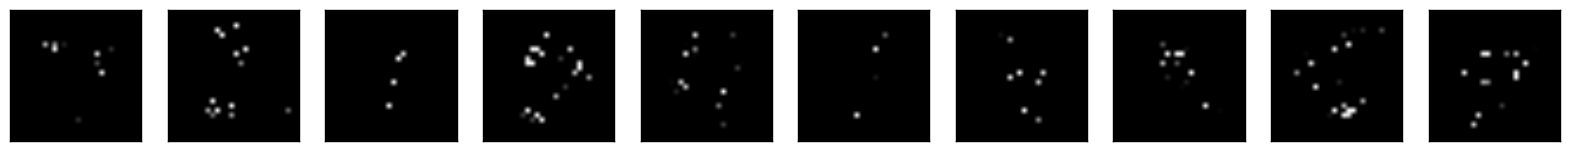

Imagenes Reconstruidas:


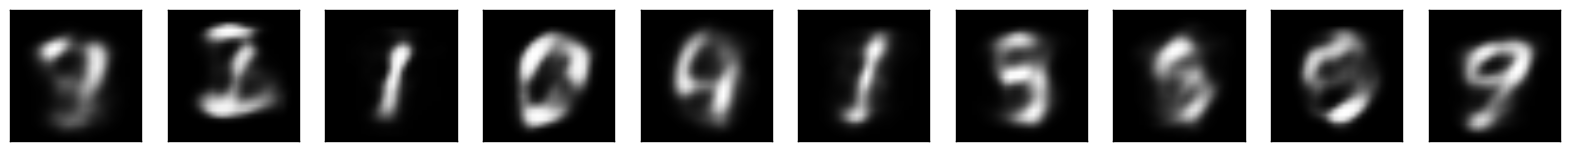

Nivel de Ruido:  0.2
Imagenes Corruptas:


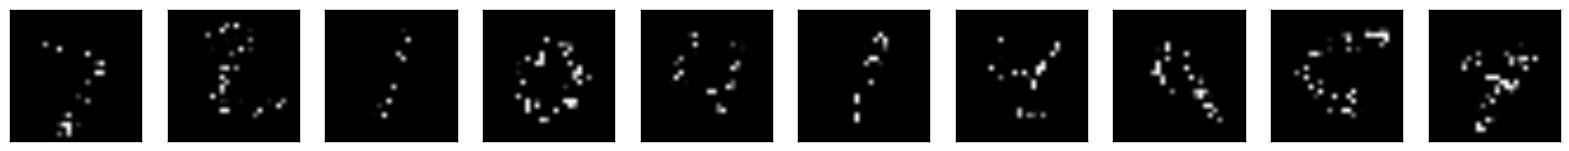

Imagenes Reconstruidas:


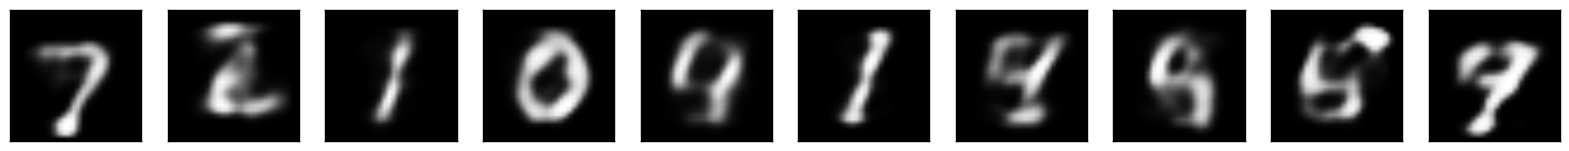

Nivel de Ruido:  0.4
Imagenes Corruptas:


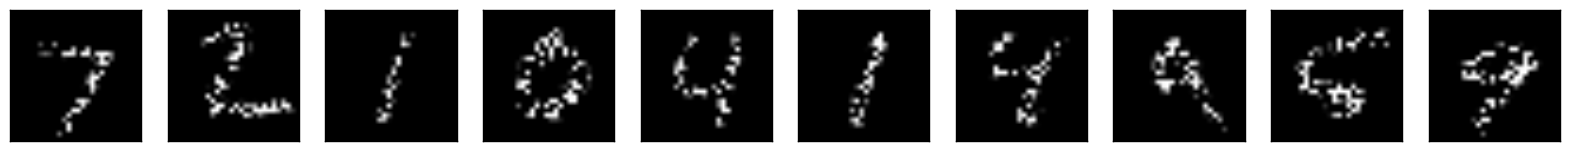

Imagenes Reconstruidas:


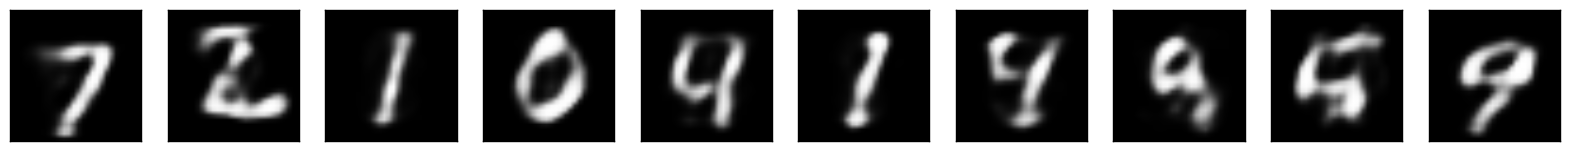

Nivel de Ruido:  0.6
Imagenes Corruptas:


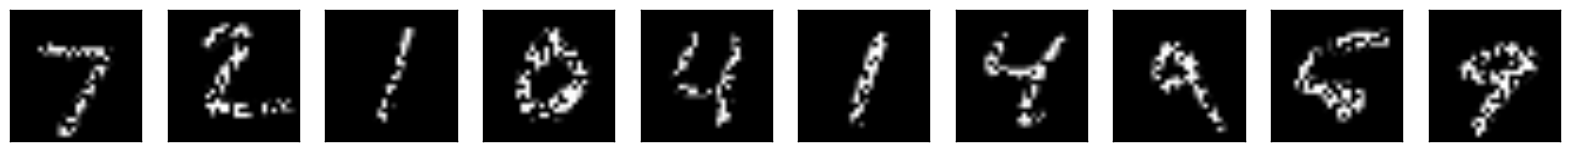

Imagenes Reconstruidas:


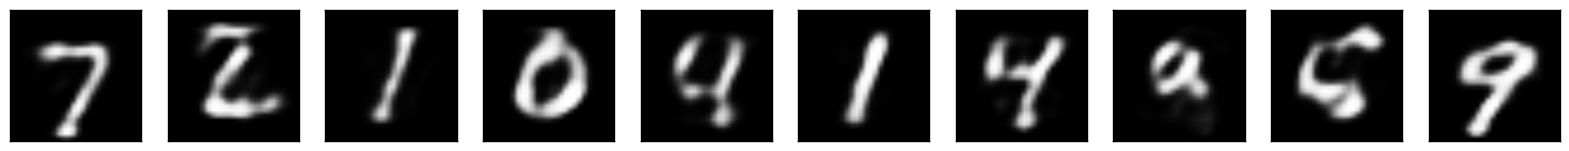

Nivel de Ruido:  0.8
Imagenes Corruptas:


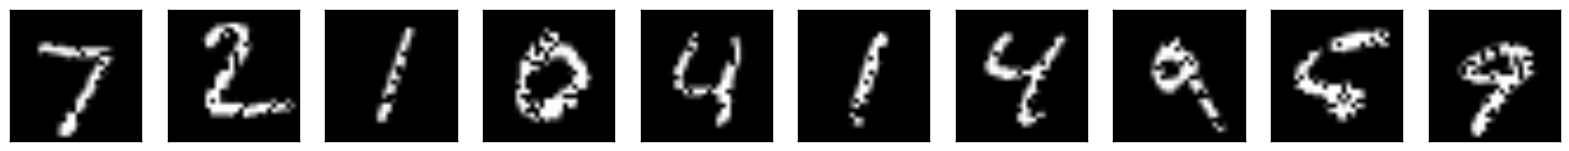

Imagenes Reconstruidas:


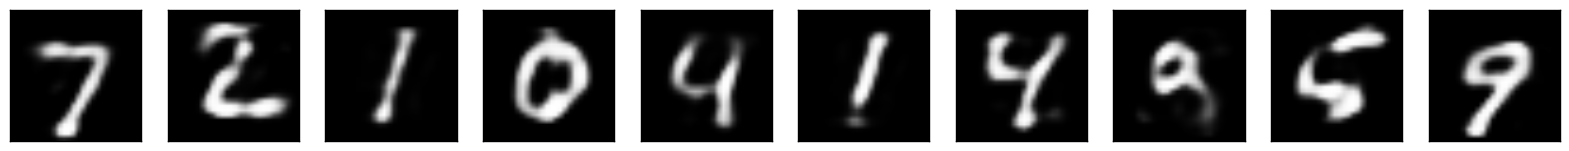

Nivel de Ruido:  1.0
Imagenes Corruptas:


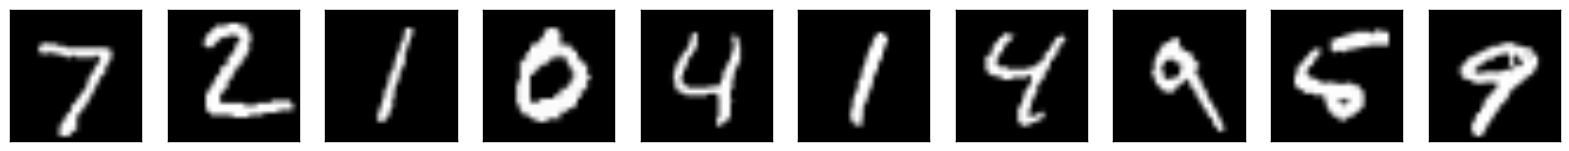

Imagenes Reconstruidas:


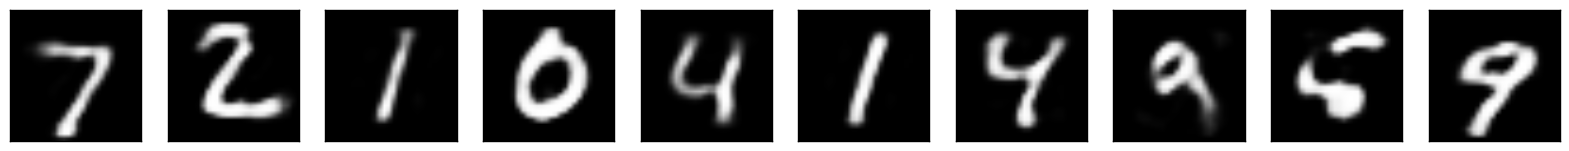

In [7]:
noise_levels = [0.1,0.2,0.4,0.6,0.8,1.0]

for i in range(len(noise_levels)):
    noise_level = noise_levels[i]

    # Se carga el encoder y decoder obtenido 
    encoder = load_model('1_2/encoder'+str(i+1)+'.h5')
    decoder = load_model('1_2/decoder'+str(i+1)+'.h5')
    
    print "Nivel de Ruido: ", noise_level

    # Se corrompe la imagen a mostrar

    noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
    noisy_x_test = x_test*noise_mask

    # Visualización postdenoising
    n = 10

    # Se muestra la imagen corrupta
    print "Imagenes Corruptas:"
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(noisy_x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

    # Se muestra la imagen reconstruida
    print "Imagenes Reconstruidas:"
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        encoded = encoder.predict(noisy_x_test[i].reshape(1,784))
        decoded = decoder.predict(encoded)
        plt.imshow(decoded.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()


Visualmente, podemos observar que existe una buena aproximación de las imágenes reconstruidas a las que debieran ser, mientras menos ruido hay es un poco menos legible la reconstrucción, pero es bastante cercana, dado la poca legibilidad de la imagen corrupta.

## c)

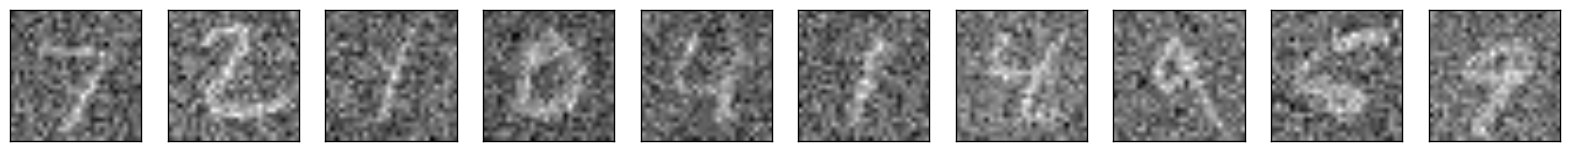

In [8]:
devst = 0.5
noise_mask = devst*standard_normal(size=x_train.shape)
noisy_x_train = x_train + noise_mask
noise_mask = devst*standard_normal(size=x_val.shape)
noisy_x_val = x_val + noise_mask
noise_mask = devst*standard_normal(size=x_test.shape)
noisy_x_test = x_test + noise_mask

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(noisy_x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Se puede visualizar la versión corrupta de las imágenes con una desviación estándar de 0.5

## d)

```python
devsts = [0.1,0.3,0.5,0.7,0.9,1.0]
i = 0

for devsts in devsts:
    i += 1
    noise_mask = devst*standard_normal(size=x_train.shape)
    noisy_x_train = x_train+noise_mask
    noise_mask = devst*standard_normal(size=x_val.shape)
    noisy_x_val = x_val+noise_mask
    noise_mask = devst*standard_normal(size=x_test.shape)
    noisy_x_test = x_test+noise_mask

    input_img = Input(shape=(784,))
    encoded = Dense(32, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(32,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    autoencoder.fit(noisy_x_train,x_train,nb_epoch=50,batch_size=25,shuffle=True, validation_data=(noisy_x_val, x_val))
    autoencoder.save("autoencoder_2_"+str(i)+".h5")
    encoder.save("encoder_2_"+str(i)+".h5")
    decoder.save("decoder_2_"+str(i)+".h5")
    
```

In [9]:
# Se carga el output obtenido para mostrarlo
text_file = open('1_2/outputd', 'r')

output = text_file.read()

#print output

devsts = [0.1,0.3,0.5,0.7,0.9,1.0]

for j in range(len(devsts)):
    
    devst = devsts[j]
    print "Desviación Estándar: ", noise_levels[j],
    #autoencoder = load_model('1_2/autoencoder'+str(j+1)+'.h5')
    encoder = load_model('1_2/encoder_2_'+str(j+1)+'.h5')
    decoder = load_model('1_2/decoder_2_'+str(j+1)+'.h5')
    
    noise_mask = devst*standard_normal(size=x_train.shape)
    noisy_x_train = x_train+noise_mask
    noise_mask = devst*standard_normal(size=x_val.shape)
    noisy_x_val = x_val+noise_mask
    noise_mask = devst*standard_normal(size=x_test.shape)
    noisy_x_test = x_test+noise_mask
    
    encoded = encoder.predict(noisy_x_test)
    reconstructed = decoder.predict(encoded)
    reconstruction_error = 0
    for i in range(len(x_test)):
        reconstruction_error += np.sum((x_test[i].astype("float") - reconstructed[i].astype("float")) ** 2)
        reconstruction_error /= float(x_test[i].shape[0])
    print "Error de Reconstrucción: ", reconstruction_error

Desviación Estándar:  0.1 Error de Reconstrucción:  0.0154601448934
Desviación Estándar:  0.2 Error de Reconstrucción:  0.0192230589524
Desviación Estándar:  0.4 Error de Reconstrucción:  0.0247891622177
Desviación Estándar:  0.6 Error de Reconstrucción:  0.0277324677148
Desviación Estándar:  0.8 Error de Reconstrucción:  0.028003726306
Desviación Estándar:  1.0 Error de Reconstrucción:  0.0326256983766


|Standard Deviation|val_loss|
|:------------:|:------------:|
|0.1|0.0962|
|0.3|0.1077|
|0.5|0.1238|
|0.7|0.1412|
|0.9|0.1553|
|1.0|0.1623|

Al contrario que la corrupción de imágenes anterior, mientras mayor es el valor de la desviación estándar, más corrompida está la imágen, por lo que los errores de reconstrucción obtenidos con la menor desviación estándar es el menor. Al igual que la versión anterior, el error es bastante pequeño lo que muestra un buen rendimiento.

Desviación Estándar:  0.1
Imagenes Corruptas:


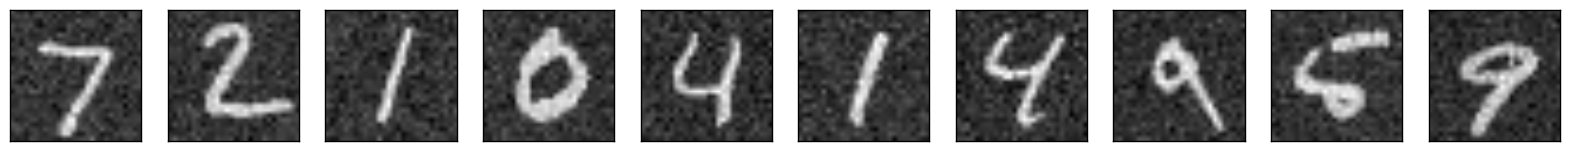

Imagenes Reconstruidas:


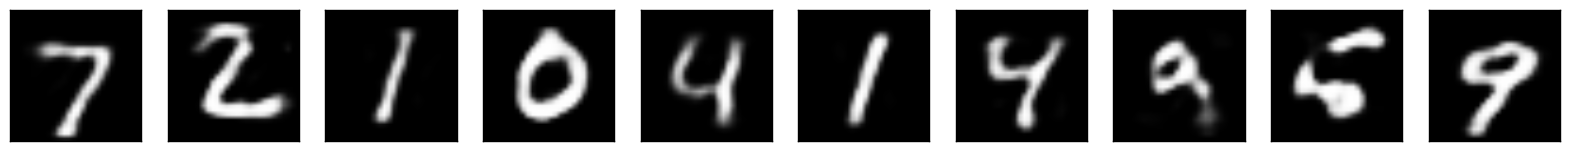

Desviación Estándar:  0.3
Imagenes Corruptas:


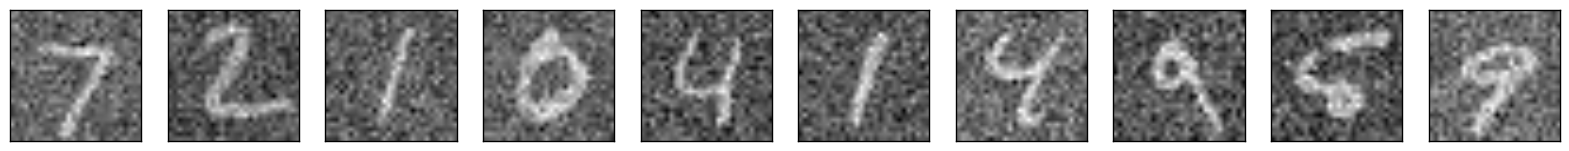

Imagenes Reconstruidas:


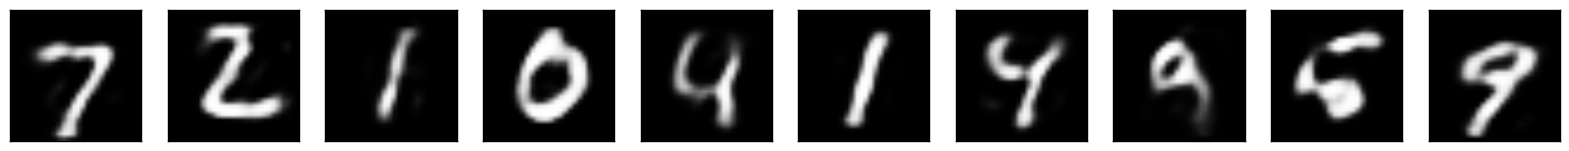

Desviación Estándar:  0.5
Imagenes Corruptas:


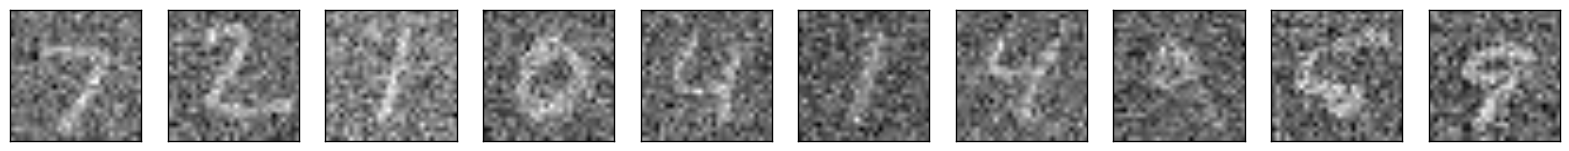

Imagenes Reconstruidas:


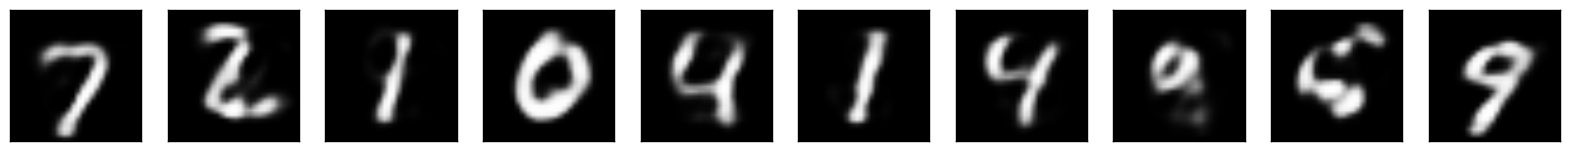

Desviación Estándar:  0.7
Imagenes Corruptas:


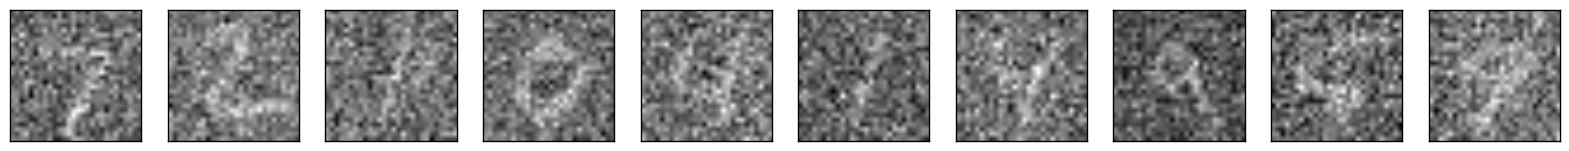

Imagenes Reconstruidas:


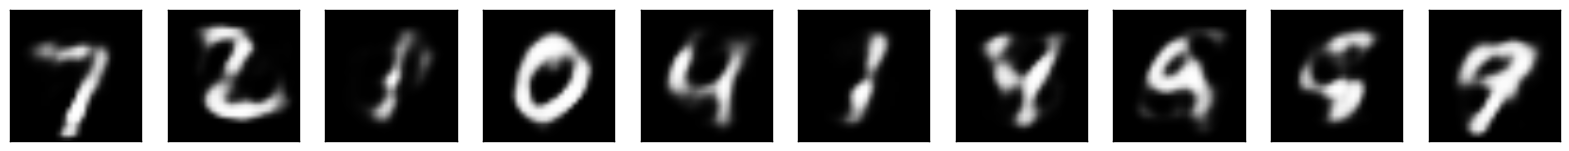

Desviación Estándar:  0.9
Imagenes Corruptas:


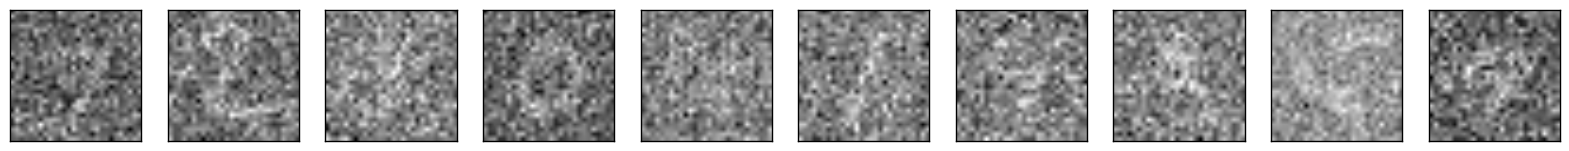

Imagenes Reconstruidas:


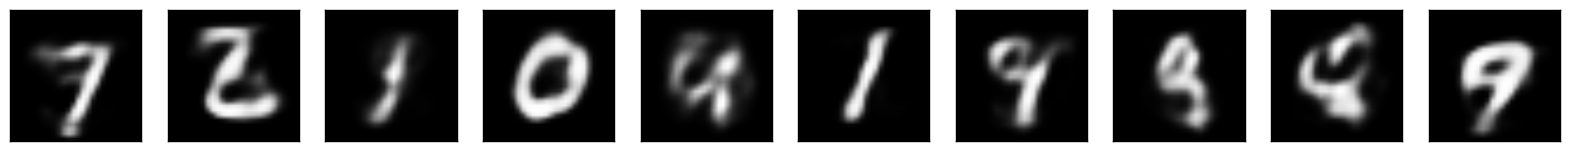

Desviación Estándar:  1.0
Imagenes Corruptas:


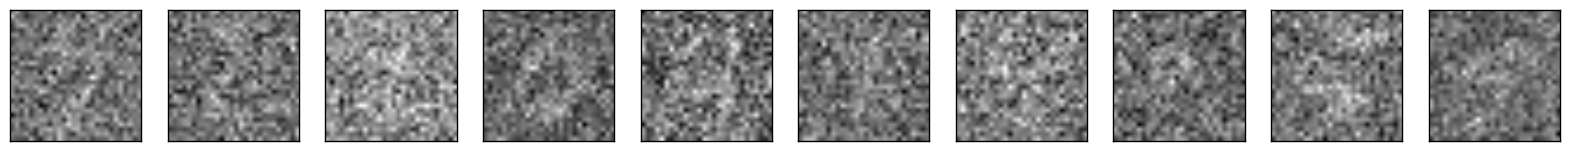

Imagenes Reconstruidas:


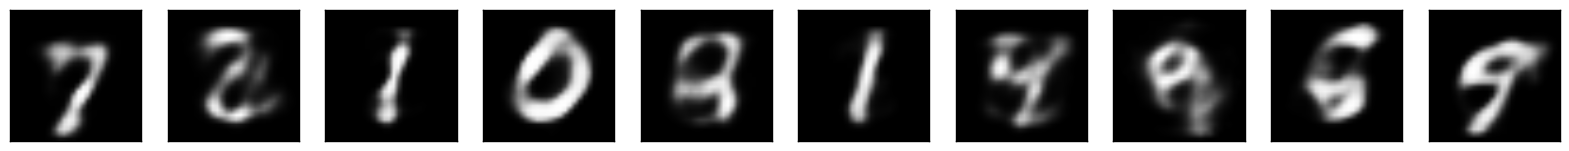

In [10]:
devsts = [0.1,0.3,0.5,0.7,0.9,1.0]

for i in range(len(devsts)):
    devst = devsts[i]

    # Se carga el encoder y decoder obtenido para noise_level 0,1
    encoder = load_model('1_2/encoder_2_'+str(i+1)+'.h5')
    decoder = load_model('1_2/decoder_2_'+str(i+1)+'.h5')

    print "Desviación Estándar: ", devst

    # Se corrompe la imagen a mostrar

    noise_mask = devst*standard_normal(size=x_train.shape)
    noisy_x_train = x_train+noise_mask
    noise_mask = devst*standard_normal(size=x_val.shape)
    noisy_x_val = x_val+noise_mask
    noise_mask = devst*standard_normal(size=x_test.shape)
    noisy_x_test = x_test+noise_mask

    # Visualización postdenoising
    n = 10

    # Se muestra la imagen corrupta
    print "Imagenes Corruptas:"
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(noisy_x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

    # Se muestra la imagen reconstruida
    print "Imagenes Reconstruidas:"
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        encoded = encoder.predict(noisy_x_test[i].reshape(1,784))
        decoded = decoder.predict(encoded)
        plt.imshow(decoded.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

Se puede observar visualmente que la reconstrucción es bastante buena incluso para el caso con desviación estándar 1.0, donde la imágen corrupta es bastante poco legible, por lo que se puede observar un muy buen rendimiento.

## e)

In [11]:
def visualize_weights(W):
    plt.figure(figsize=(16, 8))

    for ind, val in enumerate(W.T):
        ax = plt.subplot(4, 8, ind+1)
        im = val.reshape((28,28))
        plt.imshow(im, interpolation='nearest')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False) 

    plt.show()

Visualización de pesos Denoising Auto Encoder


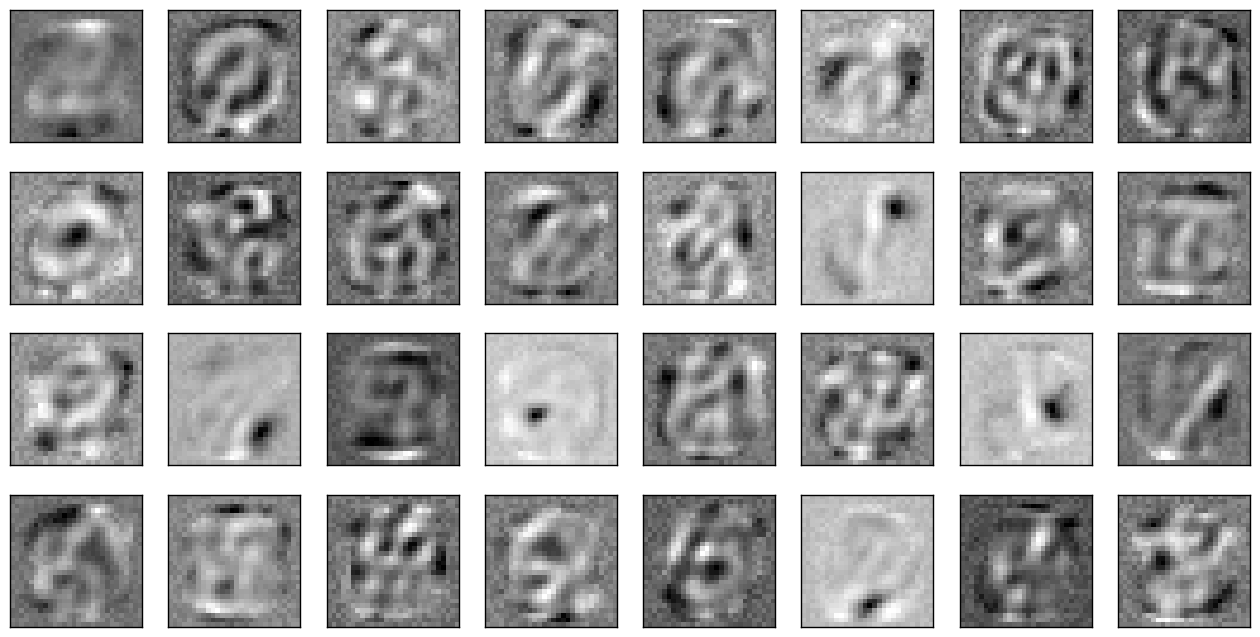

In [12]:
print "Visualización de pesos Denoising Auto Encoder"

model = load_model('1_2/autoencoder3.h5')
W1 = model.get_weights()[0]

visualize_weights(W1)

Visualización de pesos Auto Encoder Básico


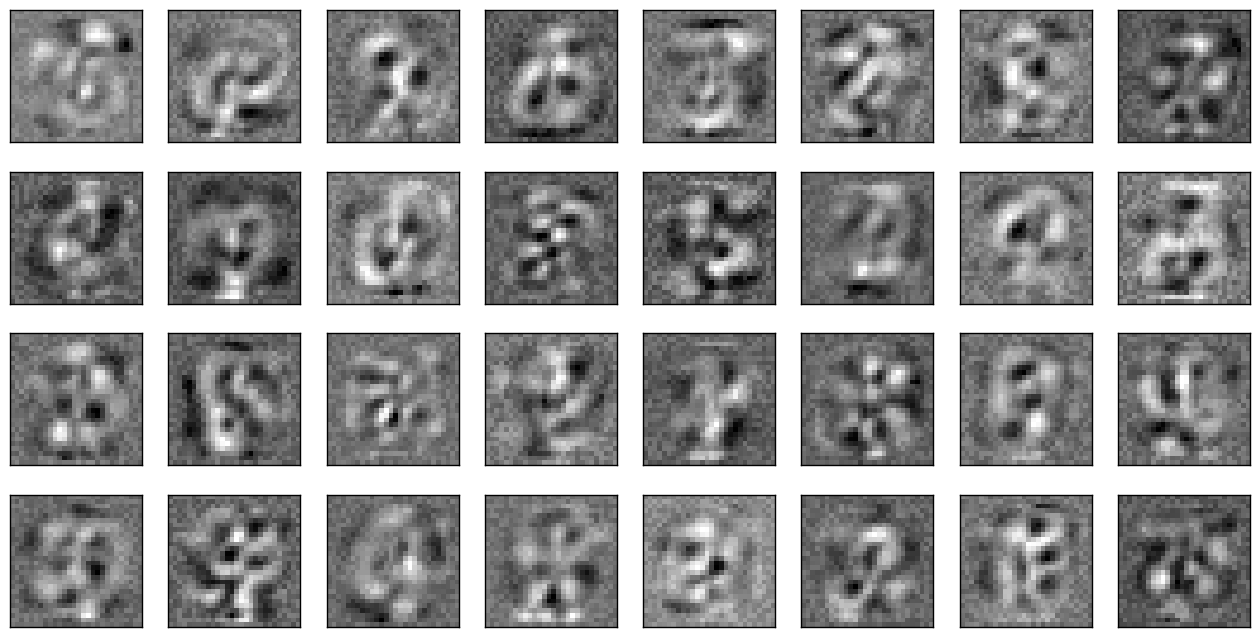

In [13]:
print "Visualización de pesos Auto Encoder Básico"

model = load_model('1_2/basic_autoencoder_relusig_768x32.h5')
W = model.get_weights()[0]

visualize_weights(W)

Se pueden observar diferencias en los pesos aprendidos por el autoencoder normal y el denoising autoencoder, mientras algunos pesos poseen características similares, hay otros que difieren, los cual podría ser netamente para eliminar el ruido de las imágenes.

## f)

In [14]:
# Autoencoder básico entrenado con datos normales
ae_basic = load_model('1_2/basic_autoencoder_relusig_768x32.h5')
# Autoencoder básico entrenado con datos corruptos
denoising_ae = load_model('1_2/autoencoder1.h5')

loss_ae = ae_basic.evaluate(x_val, x_val, batch_size=10, verbose=0)
loss_dae = denoising_ae.evaluate(x_val, x_val, batch_size=10, verbose=0)

print "Pérdida Autoencoder Normal con datos normales: ", loss_ae

print "Pérdida Denoising Autoencoder con datos normales: ", loss_dae

loss_ae = ae_basic.evaluate(noisy_x_val, x_val, batch_size=10, verbose=0)
loss_dae = denoising_ae.evaluate(noisy_x_val, x_val, batch_size=10, verbose=0)

print "Pérdida Autoencoder Normal con datos corruptos: ", loss_ae

print "Pérdida Denoising Autoencoder con datos corruptos: ", loss_dae

Pérdida Autoencoder Normal con datos normales:  0.0940659567714
Pérdida Denoising Autoencoder con datos normales:  0.61092094779
Pérdida Autoencoder Normal con datos corruptos:  0.335089786649
Pérdida Denoising Autoencoder con datos corruptos:  0.875660724044


Se puede observar que el denoising autoencoder no obtiene mejores resultados que el autoencoder normal al momento de clasificar, pero aún así el error obtenido es bajo